In [1]:
%pip install scikit-learn matplotlib

In [2]:
from sklearn.datasets import fetch_lfw_people

# Loading LFW data
lfw_people = fetch_lfw_people(min_faces_per_person=70,
                              resize=0.4,
                              data_home="./")
n_samples, h, w = lfw_people.images.shape
print("H: ",h)
print("W: ",w)
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

H:  50
W:  37
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [3]:
from sklearn.model_selection import train_test_split

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42, stratify=y)

Extracting the top 12 components from 966 faces
Projecting the input data in the new reference system


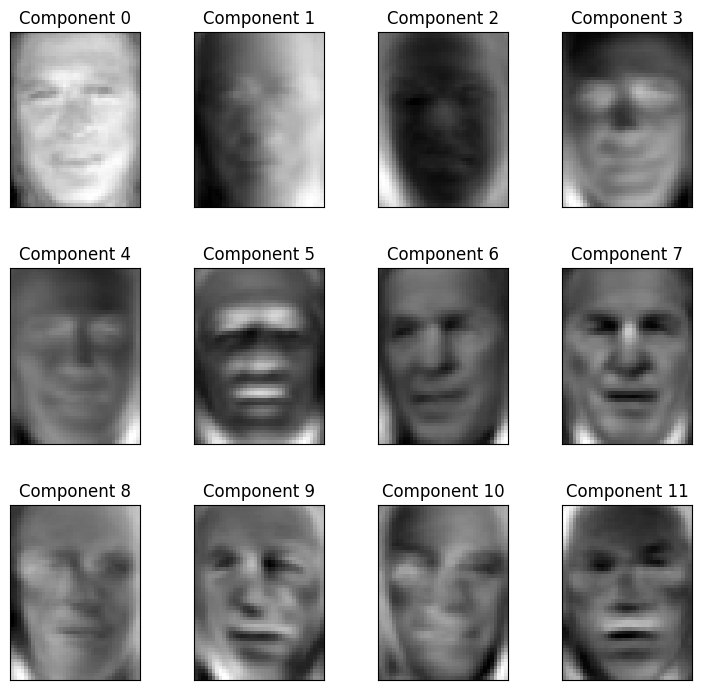

In [4]:
# PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Compute a PCA on the face dataset
n_components = 12

print("Extracting the top %d components from %d faces" %
      (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver="randomized",
          whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
print("Projecting the input data in the new reference system")
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

# Plot the gallery of the most significative eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0,
                      left=0.01,
                      right=0.99,
                      top=0.90,
                      hspace=0.35)
  for i in range(n_row * n_col):
      plt.subplot(n_row, n_col, i + 1)
      plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
      plt.title(titles[i], size=12)
      plt.xticks(())
      plt.yticks(())

eigenface_titles = [
    "Component %d" % i for i in range(eigenfaces.shape[0])
]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# #############################################################################
# Train a KNN classification model
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15]
}
clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
clf = clf.fit(X_train_new, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
KNeighborsClassifier(n_neighbors=13)


In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

print("Predicting people's names on the test set")
y_pred = clf.best_estimator_.predict(X_test_new)

print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion matrix\n %s" % (np.round(confusion_matrix(y_test, y_pred, normalize='true'),3)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.17      0.05      0.08        19
     Colin Powell       0.43      0.68      0.52        59
  Donald Rumsfeld       0.24      0.17      0.20        30
    George W Bush       0.62      0.83      0.71       133
Gerhard Schroeder       0.45      0.19      0.26        27
      Hugo Chavez       0.75      0.17      0.27        18
       Tony Blair       0.50      0.11      0.18        36

         accuracy                           0.52       322
        macro avg       0.45      0.31      0.32       322
     weighted avg       0.50      0.52      0.47       322

Confusion matrix
 [[0.053 0.421 0.211 0.263 0.053 0.    0.   ]
 [0.051 0.678 0.    0.271 0.    0.    0.   ]
 [0.    0.467 0.167 0.367 0.    0.    0.   ]
 [0.015 0.113 0.03  0.827 0.008 0.    0.008]
 [0.    0.222 0.148 0.333 0.185 0.    0.111]
 [0.    0.111 0.    0.667 0.056 0.167 0.   ]
 [0.    0.25  0.11